<a href="https://colab.research.google.com/github/johnnysDeu/Thesis/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.youtube.com/watch?v=jztwpsIzEGc

Building a CNN from scratch with any image dataset

!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [1]:
#!pip install "tensorflow<2.11"

In [2]:
#!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [3]:
#!pip install --upgrade pip

In [4]:
#!pip install torchvision

In [5]:

#!pip list
import torch

In [6]:
#!nvidia-smi

In [7]:
#!pip install torch==1.10.1+cu113 torchvision==0.11.2+cu113 torchaudio===0.10.1+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

In [8]:
# add headings with ##(space) on the markdowns

In [9]:
#!pip install tensorflor keras

In [10]:
import tensorflow as tf
import os

In [11]:
!nvidia-smi

Sat Apr 13 17:55:27 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 536.67                 Driver Version: 536.67       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1660 ...  WDDM  | 00000000:2D:00.0  On |                  N/A |
|  0%   49C    P8              16W / 125W |    932MiB /  6144MiB |     12%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [12]:
gpus = tf.config.experimental.list_physical_devices('GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [13]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

In [14]:
#! nvidia-smi

In [15]:
#!pip install opencv-python

## Imports

In [16]:
import tensorflow as tf
import os
import cv2
import imghdr

## Removing false images

In [17]:
#from google.colab import drive # fur colab
#drive.mount('/content/drive')

In [18]:
import numpy as np
from matplotlib import pyplot as plt

In [19]:
Current_dir = os.getcwd()
Current_dir

'c:\\Users\\YannisPC\\PycharmProjects\\Thesis\\Thesis'

In [20]:
#path = '/content/drive/MyDrive/Colab Notebooks/Thesis'
#os.chdir(path)

In [21]:
Current_dir = os.getcwd()
Current_dir

'c:\\Users\\YannisPC\\PycharmProjects\\Thesis\\Thesis'

In [22]:
data_dir='data'
os.listdir(data_dir)

['Ads', 'Sample_Images']

In [23]:
os.listdir(os.path.join(data_dir,'Ads'))

['converted_iframe_1005_AD.jpg',
 'converted_iframe_1006_AD.jpg',
 'converted_iframe_100_AD.jpg',
 'converted_iframe_101_AD.jpg',
 'converted_iframe_1025_AD.jpg',
 'converted_iframe_102_AD.jpg',
 'converted_iframe_103_AD.jpg',
 'converted_iframe_1046_AD.jpg',
 'converted_iframe_104_AD.jpg',
 'converted_iframe_1058_AD.jpg',
 'converted_iframe_105_AD.jpg',
 'converted_iframe_1062_AD.jpg',
 'converted_iframe_106_AD.jpg',
 'converted_iframe_1075_AD.jpg',
 'converted_iframe_1079_AD.jpg',
 'converted_iframe_107_AD.jpg',
 'converted_iframe_1087_AD.jpg',
 'converted_iframe_108_AD.jpg',
 'converted_iframe_1094_AD.jpg',
 'converted_iframe_1095_AD.jpg',
 'converted_iframe_109_AD.jpg',
 'converted_iframe_10_AD.jpg',
 'converted_iframe_1100_AD.jpg',
 'converted_iframe_110_AD.jpg',
 'converted_iframe_1116_AD.jpg',
 'converted_iframe_111_AD.jpg',
 'converted_iframe_1122_AD.jpg',
 'converted_iframe_1138_AD.jpg',
 'converted_iframe_1139_AD.jpg',
 'converted_iframe_1141_AD.jpg',
 'converted_iframe_1145_

In [24]:
imgTest= cv2.imread(os.path.join('data','Sample_Images','converted_main_3.jpg'))
#imgTest= cv2.imread(os.path.join('data','Sample_Images','main_2.jpg'))

In [25]:
type(imgTest)

numpy.ndarray

In [26]:
imgTest.shape

(602, 1200, 3)

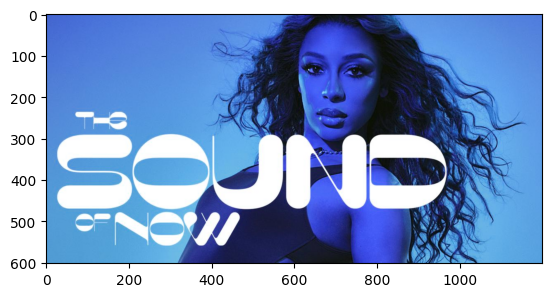

In [27]:
plt.imshow(imgTest)

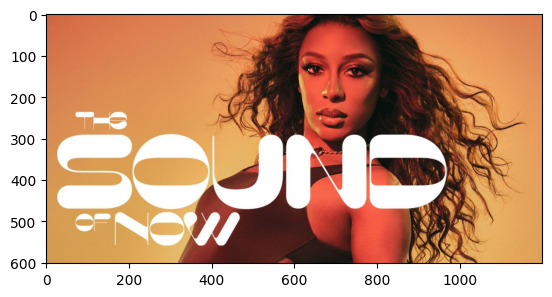

In [28]:
plt.imshow(cv2.cvtColor(imgTest, cv2.COLOR_BGR2RGB))
plt.show()

Load Data

In [29]:
#tf.data.Dataset??

In [30]:
#tf.keras.utils.audio_dataset_from_directory??

In [31]:
data=tf.keras.utils.image_dataset_from_directory('data', batch_size=32)

Found 11260 files belonging to 2 classes.


In [32]:
data_iterator=data.as_numpy_iterator()


In [33]:
batch=data_iterator.next()


In [34]:
len(batch) # batch contain 2 items, the image batch[0] and the label batch[1]

2

In [35]:
batch[0].shape # images are numpy arrays

(32, 256, 256, 3)

In [36]:
batch[1] # labels

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

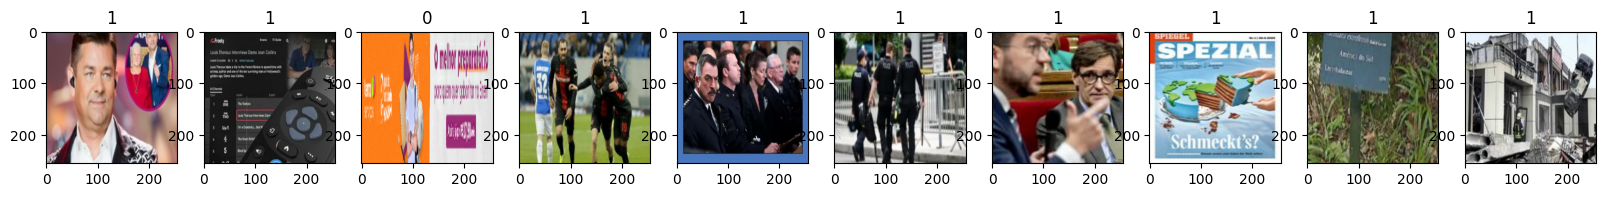

In [37]:
fig, ax = plt.subplots(ncols=10, figsize=(20,20)) # class 1= simple image, class 0 = Ad
for idx, img in enumerate(batch[0][:10]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

From the above plot, we see how the function assigns the classes (this may change from run-to-run):

simple image = 1 <br>
Ad = 0

## Preprocess data

In [38]:
#print(batch[0].max()) # our pixels are between values 0 and 255. we will scale them to be between 0 and 1

In [39]:
#batch[0] / 255

In [40]:
scaled= data.map(lambda x,y: (x/255, y)) # as we load a batch from the pipeline, we scale them on the go

In [41]:
scaled.as_numpy_iterator().next()

(array([[[[0.31384805, 0.16875   , 0.09816176],
          [0.3548407 , 0.21075368, 0.1421875 ],
          [0.31700367, 0.18088235, 0.1164522 ],
          ...,
          [0.27677697, 0.16194853, 0.05382966],
          [0.31323528, 0.18293504, 0.08186275],
          [0.31865808, 0.17815563, 0.08370098]],
 
         [[0.31719586, 0.16992259, 0.09715911],
          [0.32775208, 0.18148983, 0.1096268 ],
          [0.32483795, 0.18560672, 0.11558551],
          ...,
          [0.3069075 , 0.18274932, 0.05846905],
          [0.3561114 , 0.21605656, 0.10137197],
          [0.34843177, 0.2010297 , 0.09153526]],
 
         [[0.35075948, 0.1997178 , 0.11914182],
          [0.3172605 , 0.16696921, 0.08639323],
          [0.33112746, 0.18636642, 0.10665929],
          ...,
          [0.35348955, 0.21216539, 0.0623437 ],
          [0.40625143, 0.24975586, 0.11126038],
          [0.38648897, 0.22545956, 0.09074755]],
 
         ...,
 
         [[0.06941397, 0.02627671, 0.00367144],
          [0.08198

In [42]:
scaled_iterator=scaled.as_numpy_iterator()

In [43]:
batch = scaled_iterator.next()

In [44]:
batch[0].min()

0.0

In [45]:
scaled.as_numpy_iterator().next()

(array([[[[0.8392157 , 0.84313726, 0.85882354],
          [0.8392157 , 0.84313726, 0.85882354],
          [0.8392157 , 0.84313726, 0.85882354],
          ...,
          [0.03920037, 0.03920037, 0.03135723],
          [0.06508885, 0.06508885, 0.05724571],
          [0.07843138, 0.07843138, 0.07058824]],
 
         [[0.8380515 , 0.84197307, 0.85765934],
          [0.8380515 , 0.84197307, 0.85765934],
          [0.8380515 , 0.84197307, 0.85765934],
          ...,
          [0.06811021, 0.06811021, 0.06026707],
          [0.12178525, 0.12178525, 0.1139421 ],
          [0.14944853, 0.14944853, 0.14160539]],
 
         [[0.83596814, 0.8398897 , 0.855576  ],
          [0.83596814, 0.8398897 , 0.855576  ],
          [0.83596814, 0.8398897 , 0.855576  ],
          ...,
          [0.11984361, 0.11984361, 0.11200047],
          [0.22324196, 0.22324196, 0.21539882],
          [0.27653188, 0.27653188, 0.26868874]],
 
         ...,
 
         [[0.91672796, 0.75594366, 0.3951593 ],
          [0.91842

# Split Data

In [46]:
#len(scaled)
len(data)

352

In [47]:
train_size = int(len(scaled)*.7)# batch size 8, 156 batches, 32, 41 batches
val_size = int(len(scaled)*.2) # 44 batces
test_size = int(len(scaled)*.1) # 22 batches
#test_size = int(len(scaledtest)) # 22 batches

In [48]:
print(f'Train Size: {train_size}, Val Size:{val_size}, Test Size: {test_size}')


Train Size: 246, Val Size:70, Test Size: 35


In [49]:
train = scaled.take(train_size)
val = scaled.skip(train_size).take(val_size)
test = scaled.skip(train_size+val_size).take(test_size)

In [50]:
train.as_numpy_iterator().next()[0]

array([[[[0.9098039 , 0.9254902 , 0.92941177],
         [0.9098039 , 0.9254902 , 0.92941177],
         [0.9098039 , 0.9254902 , 0.92941177],
         ...,
         [0.9098039 , 0.92941177, 0.9411765 ],
         [0.9098039 , 0.92941177, 0.9411765 ],
         [0.9098039 , 0.92941177, 0.9411765 ]],

        [[0.9098039 , 0.9254902 , 0.92941177],
         [0.9098039 , 0.9254902 , 0.92941177],
         [0.9098039 , 0.9254902 , 0.92941177],
         ...,
         [0.9098039 , 0.92941177, 0.9411765 ],
         [0.9098039 , 0.92941177, 0.9411765 ],
         [0.9098039 , 0.92941177, 0.9411765 ]],

        [[0.9098039 , 0.9254902 , 0.92941177],
         [0.9098039 , 0.9254902 , 0.92941177],
         [0.9098039 , 0.9254902 , 0.92941177],
         ...,
         [0.9098039 , 0.92941177, 0.9411765 ],
         [0.9098039 , 0.92941177, 0.9411765 ],
         [0.9098039 , 0.92941177, 0.9411765 ]],

        ...,

        [[0.6545452 , 0.5643491 , 0.53297657],
         [0.64884704, 0.558651  , 0.5272784 ]

In [51]:
batch[0]

array([[[[0.6       , 0.7294118 , 1.        ],
         [0.48707107, 0.61202514, 0.9138174 ],
         [0.31243873, 0.43049937, 0.78054535],
         ...,
         [0.8939185 , 0.60695463, 0.00220588],
         [0.95595896, 0.6575061 , 0.03897059],
         [0.99607843, 0.6901961 , 0.0627451 ]],

        [[0.5909007 , 0.72166055, 0.999663  ],
         [0.4807811 , 0.6073386 , 0.9134804 ],
         [0.31049302, 0.43055204, 0.78020835],
         ...,
         [0.89653164, 0.6096152 , 0.00226512],
         [0.9571898 , 0.6595743 , 0.04001716],
         [0.99641544, 0.6918811 , 0.06443015]],

        [[0.54954046, 0.6864277 , 0.99813116],
         [0.4521903 , 0.5860361 , 0.9119485 ],
         [0.3016489 , 0.4307914 , 0.77867645],
         ...,
         [0.9084096 , 0.6217085 , 0.0025344 ],
         [0.9627847 , 0.6689749 , 0.04477431],
         [0.9979473 , 0.69954044, 0.07208946]],

        ...,

        [[0.2745711 , 0.36139706, 0.34571078],
         [0.34568566, 0.426568  , 0.4093958 ]

In [52]:
len(train)

246

# Model

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten ,Dropout

In [54]:
model = Sequential()

In [55]:
model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(256,256,3))) # mhpws 150,150
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [56]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4), loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

# Train

In [58]:
hist = model.fit(train, epochs=20, validation_data=val)

Epoch 1/20


246/246 [==============================] - ETA: 0s - loss: 0.2969 - accuracy: 0.8952

ResourceExhaustedError: Graph execution error:

Detected at node 'IteratorGetNext' defined at (most recent call last):
    File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.3568.0_x64__qbz5n2kfra8p0\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.3568.0_x64__qbz5n2kfra8p0\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\YannisPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\YannisPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\YannisPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "C:\Users\YannisPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.3568.0_x64__qbz5n2kfra8p0\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.3568.0_x64__qbz5n2kfra8p0\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.3568.0_x64__qbz5n2kfra8p0\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\YannisPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "C:\Users\YannisPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "C:\Users\YannisPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "C:\Users\YannisPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\YannisPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "C:\Users\YannisPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\YannisPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "C:\Users\YannisPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "C:\Users\YannisPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\YannisPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\YannisPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\YannisPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\YannisPC\AppData\Local\Temp\ipykernel_12632\3485218523.py", line 1, in <module>
      hist = model.fit(train, epochs=20, validation_data=val)
    File "C:\Users\YannisPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\YannisPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\training.py", line 1606, in fit
      val_logs = self.evaluate(
    File "C:\Users\YannisPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\YannisPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\training.py", line 1947, in evaluate
      tmp_logs = self.test_function(iterator)
    File "C:\Users\YannisPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\training.py", line 1727, in test_function
      return step_function(self, iterator)
    File "C:\Users\YannisPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\training.py", line 1712, in step_function
      data = next(iterator)
Node: 'IteratorGetNext'
Detected at node 'IteratorGetNext' defined at (most recent call last):
    File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.3568.0_x64__qbz5n2kfra8p0\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.3568.0_x64__qbz5n2kfra8p0\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\YannisPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\YannisPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\YannisPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "C:\Users\YannisPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.3568.0_x64__qbz5n2kfra8p0\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.3568.0_x64__qbz5n2kfra8p0\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.3568.0_x64__qbz5n2kfra8p0\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\YannisPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "C:\Users\YannisPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "C:\Users\YannisPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "C:\Users\YannisPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\YannisPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "C:\Users\YannisPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\YannisPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "C:\Users\YannisPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "C:\Users\YannisPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\YannisPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\YannisPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\YannisPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\YannisPC\AppData\Local\Temp\ipykernel_12632\3485218523.py", line 1, in <module>
      hist = model.fit(train, epochs=20, validation_data=val)
    File "C:\Users\YannisPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\YannisPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\training.py", line 1606, in fit
      val_logs = self.evaluate(
    File "C:\Users\YannisPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\YannisPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\training.py", line 1947, in evaluate
      tmp_logs = self.test_function(iterator)
    File "C:\Users\YannisPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\training.py", line 1727, in test_function
      return step_function(self, iterator)
    File "C:\Users\YannisPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\training.py", line 1712, in step_function
      data = next(iterator)
Node: 'IteratorGetNext'
2 root error(s) found.
  (0) RESOURCE_EXHAUSTED:  Failed to allocate memory for the batch of component 0
	 [[{{node IteratorGetNext}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.

	 [[IteratorGetNext/_2]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.

  (1) RESOURCE_EXHAUSTED:  Failed to allocate memory for the batch of component 0
	 [[{{node IteratorGetNext}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.

0 successful operations.
0 derived errors ignored. [Op:__inference_test_function_2506]

In [ ]:
model.save('Ad_classifier_medium_1.h5')

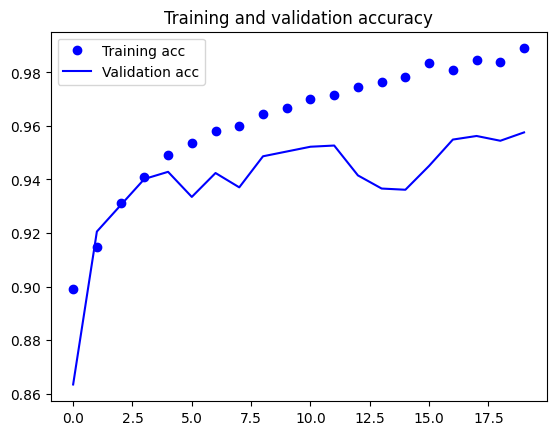

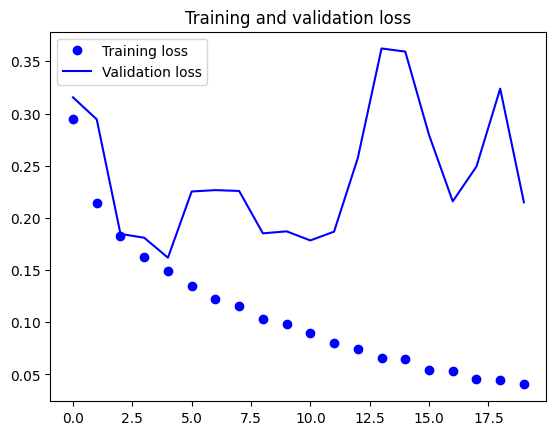

In [ ]:
import matplotlib.pyplot as plt

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Evaluate

In [ ]:

from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
    print(f'Precision: {pre.result()}, Recall:{re.result()}, Accuracy: {acc.result()}')

1/1 [==============================] - 0s 161ms/step
Precision: 0.8620689511299133, Recall:0.9615384340286255, Accuracy: 0.84375
1/1 [==============================] - 0s 27ms/step
Precision: 0.8999999761581421, Recall:0.9818181991577148, Accuracy: 0.890625
1/1 [==============================] - 0s 27ms/step
Precision: 0.9130434989929199, Recall:0.9882352948188782, Accuracy: 0.90625
1/1 [==============================] - 0s 27ms/step
Precision: 0.9237288236618042, Recall:0.9909090995788574, Accuracy: 0.921875
1/1 [==============================] - 0s 28ms/step
Precision: 0.9266666769981384, Recall:0.9928571581840515, Accuracy: 0.925000011920929
1/1 [==============================] - 0s 26ms/step
Precision: 0.932584285736084, Recall:0.9940119981765747, Accuracy: 0.9322916865348816
1/1 [==============================] - 0s 28ms/step
Precision: 0.9417475461959839, Recall:0.9897959232330322, Accuracy: 0.9375
1/1 [==============================] - 0s 28ms/step
Precision: 0.9489361643791199,

# Extra Testing on Unseen Data

In [ ]:
import cv2

In [ ]:
Current_dir = os.getcwd()
Current_dir

'c:\\Users\\YannisPC\\PycharmProjects\\Thesis\\Thesis'

In [ ]:
#img = cv2.imread('sim.jpg')
#img= cv2.imread(os.path.join('testData','4.png')) # s (246).jpg, 9.png, 4.png, s (481).jpg
img= cv2.imread(os.path.join('unseen data','iframe_7.jpg')) # futurama.jpeg, homer-simpson-wallpaper-preview.jpg , zoid.jpeg, bart-simpson-.jpg, fry.jpeg, homer-simpson-the-simpsons-.jpg, marg.jpg
#img

In [ ]:
len(img)


1000

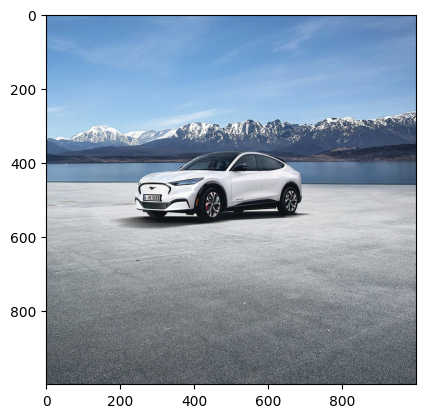

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
resize = tf.image.resize(img, (256,256))
#plt.imshow(resize.numpy().astype(int))
#plt.show()

In [ ]:
resize.shape

TensorShape([256, 256, 3])

In [ ]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 19ms/step


array([[0.73239946]], dtype=float32)

In [ ]:
#class 1= futurama, class 0 = simpsons

if yhat < 0.5:
    print(f'Predicted Simple Image')
else:
    print(f'Predicted Ad')

Predicted Ad


# Saving the model

In [ ]:
from keras.models import load_model

In [ ]:
#model.save(os.path.join('models','futurama_and_simpsons_First.h5'))
#model.summary()